# K-means : clusterer pour mieux régner 

## Import modules

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Import iris dataset

In [0]:
iris = datasets.load_iris()

In [0]:
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

In [4]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


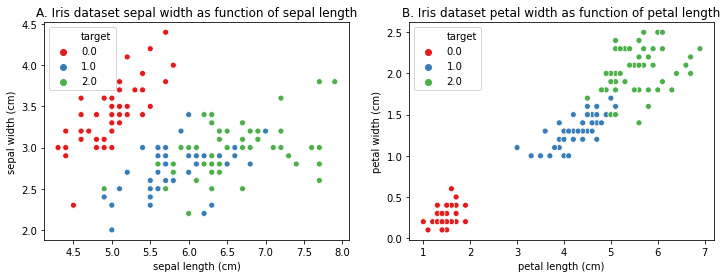

In [6]:
fig = plt.subplots(figsize = (12, 4))
ax1 = plt.subplot(121)
ax1 = sns.scatterplot('sepal length (cm)', 'sepal width (cm)', data = df_iris, hue = 'target', palette = 'Set1')
ax1 = plt.title('A. Iris dataset sepal width as function of sepal length')

ax2 = plt.subplot(122)
ax2 = sns.scatterplot('petal length (cm)', 'petal width (cm)', data = df_iris, hue = 'target', palette = 'Set1')
ax2 = plt.title('B. Iris dataset petal width as function of petal length')

## K-means model

### Select data
**Decision:** 

From the previous chart, I think that the better way to discriminate the 3 group of iris is to use `petal length (cm)` and `petal width (cm)`


In [0]:
X = df_iris[['petal length (cm)', 'petal width (cm)']]

### Create k-means model
**Note:** 

We already know that we have ***3 type of iris (targets)***, so the ***`n_cluster` parameter*** is equal to ***3***.

In [0]:
kmeans = KMeans(n_clusters = 3, random_state = 42).fit(X)

In [9]:
df_iris['predict_target'] = kmeans.labels_

df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,predict_target
0,5.1,3.5,1.4,0.2,0.0,0
1,4.9,3.0,1.4,0.2,0.0,0
2,4.7,3.2,1.3,0.2,0.0,0
3,4.6,3.1,1.5,0.2,0.0,0
4,5.0,3.6,1.4,0.2,0.0,0


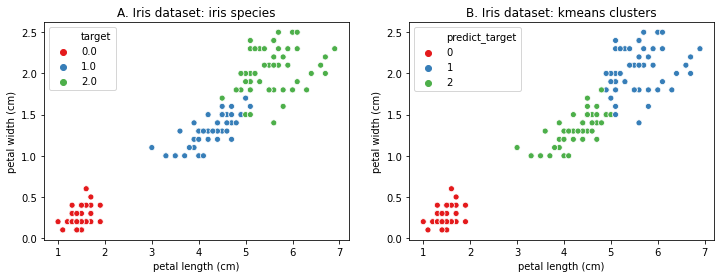

In [10]:
fig = plt.subplots(figsize = (12, 4))
ax1 = plt.subplot(121)
ax1 = sns.scatterplot('petal length (cm)', 'petal width (cm)', data = df_iris, hue = 'target', palette = 'Set1')
ax1 = plt.title('A. Iris dataset: iris species')

ax2 = plt.subplot(122)
ax2 = sns.scatterplot('petal length (cm)', 'petal width (cm)', data = df_iris, hue = 'predict_target', palette = 'Set1')
ax2 = plt.title('B. Iris dataset: kmeans clusters')


### Rescale x and y with MinMaxScaler **[*optional*]**

What if we rescale our axis ?

#### We transform x and y axis 

In [11]:
scaler = MinMaxScaler()
df2_iris = df_iris.copy()

scaler.fit(df2_iris[['petal length (cm)']])
df2_iris['petal length (cm)'] = scaler.transform(df2_iris[['petal length (cm)']])

scaler.fit(df2_iris[['petal width (cm)']])
df2_iris['petal width (cm)'] = scaler.transform(df2_iris[['petal width (cm)']])

df2_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,predict_target
0,5.1,3.5,0.067797,0.041667,0.0,0
1,4.9,3.0,0.067797,0.041667,0.0,0
2,4.7,3.2,0.050847,0.041667,0.0,0
3,4.6,3.1,0.084746,0.041667,0.0,0
4,5.0,3.6,0.067797,0.041667,0.0,0


#### We fit the k-Means model on the new data

In [12]:
X2 = df2_iris[['petal length (cm)', 'petal width (cm)']]

kmeans2 = KMeans(n_clusters = 3, random_state = 42).fit(X2)

df2_iris['predict_target'] = kmeans2.labels_
df2_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,predict_target
0,5.1,3.5,0.067797,0.041667,0.0,0
1,4.9,3.0,0.067797,0.041667,0.0,0
2,4.7,3.2,0.050847,0.041667,0.0,0
3,4.6,3.1,0.084746,0.041667,0.0,0
4,5.0,3.6,0.067797,0.041667,0.0,0


#### Vizualise the result

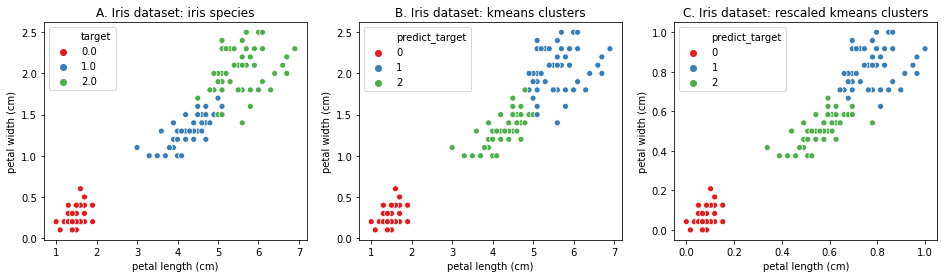

In [13]:
fig = plt.subplots(figsize = (16, 4))
ax1 = plt.subplot(131)
ax1 = sns.scatterplot('petal length (cm)', 'petal width (cm)', data = df_iris, hue = 'target', palette = 'Set1')
ax1 = plt.title('A. Iris dataset: iris species')

ax2 = plt.subplot(132)
ax2 = sns.scatterplot('petal length (cm)', 'petal width (cm)', data = df_iris, hue = 'predict_target', palette = 'Set1')
ax2 = plt.title('B. Iris dataset: kmeans clusters')

ax3 = plt.subplot(133)
ax3 = sns.scatterplot('petal length (cm)', 'petal width (cm)', data = df2_iris, hue = 'predict_target', palette = 'Set1')
ax3 = plt.title('C. Iris dataset: rescaled kmeans clusters')

**Conclusion:** 

The x and y axis rescaling seems to be not very efficient to improve our model performances.

## Evaluation of the models with the **Elbow method**

In [0]:
k_rng = range(1,11)
sse = []
for k in k_rng:
  km = KMeans(n_clusters = k)
  km.fit(X)
  sse.append(km.inertia_)

In [15]:
sse

[550.8953333333334,
 86.39021984551397,
 31.371358974358973,
 19.48300089968511,
 13.916908757908757,
 11.03633387775173,
 9.215301022648848,
 7.667019523446297,
 6.480259206692711,
 5.635610102457929]

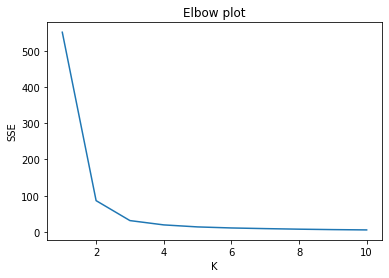

In [16]:
p = plt.title('Elbow plot')
p = plt.xlabel('K')
p = plt.ylabel('SSE')
p = plt.plot(k_rng, sse)

**Conclusion:**

The ***Elbow*** could be observed between 2 and 3 clusters. In our data we know that **we have 3 iris species**, so we can conclude that the model **with 3 clusters is good**, but the **best seems to be with 2 clusters**. 

#### For the rescaled model **[*optional*]**

In [0]:
k_rng = range(1,11)
sse2 = []
for k in k_rng:
  km = KMeans(n_clusters = k)
  km.fit(X2)
  sse2.append(km.inertia_)

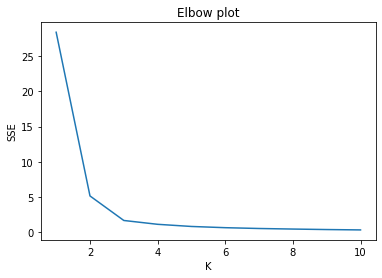

In [18]:
p = plt.title('Elbow plot')
p = plt.xlabel('K')
p = plt.ylabel('SSE')
p = plt.plot(k_rng, sse2)